# EDA

In [3]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df_absrb= pd.read_csv('absorbance.csv')


In [66]:
df_absrb.head()

Subject  Gender                  DOT                  DOB  AgeM      AgeY  \
0        8       0  2016-05-12 00:00:00  2006-12-18 00:00:00   112  9.333333   
1       22       0  2016-05-18 00:00:00  2006-10-27 00:00:00   114  9.500000   
2       24       1  2016-05-18 00:00:00  2006-07-02 00:00:00   118  9.833333   
3       31       0  2016-05-19 00:00:00  2006-06-01 00:00:00   119  9.916667   
4       42       0  2016-05-20 00:00:00  2008-06-03 00:00:00    95  7.916667   

         Eth1 Eth2  Unnamed: 15    Lang1  ... f(6168.8433)  f(6349.6042)  \
0  Australian  NaN          0.0  English  ...       0.5370        0.4869   
1  Australian  NaN          0.0  English  ...       0.2636        0.2578   
2  Australian  NaN          0.0  English  ...       0.4269        0.4142   
3  Australian  NaN          0.0  English  ...       0.0077        0.0123   
4  Australian  NaN          0.0  English  ...       0.2332        0.2216   

   f(6535.6618)  f(6727.1713)  f(6924.2925)  f(7127.1897)  f(7336.0323)  \
0        0.4301        0.4080        0.3804        0.3291        0.2951   
1        0.2443        0.2549        0.2604        0.2397        0.2299   
2        0.3910        0.3799        0.3740        0.3536        0.3473   
3        0.0066       -0.0024        0.0126        0.0231        0.0405   
4        0.2228        0.2653        0.2596        0.2576        0.2838   

   f(7550.9945) f(7772.2555)  f(8000.0000)  
0        0.2530       0.2282        0.2003  
1        0.2048       0.1917        0.1659  
2        0.3237       0.3056        0.2881  
3        0.0401       0.0391        0.0258  
4        0.3598       0.3953        0.3642  

[5 rows x 146 columns]

Text(0.5, 1.0, 'AgeY vs Static Compliane')

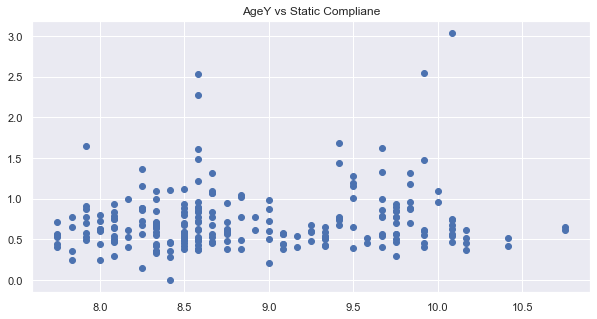

In [67]:
#Scatter plot on AgeY vs Static Compliane
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(df_absrb.AgeY,df_absrb.SC)
plt.title( "AgeY vs Static Compliane" )

Here we can see that the Static compliane  is comparatively consolidated between 0 to 1.5 among the age group with few outliers

Text(0.5, 1.0, 'AgeY vs Ear canal volume')

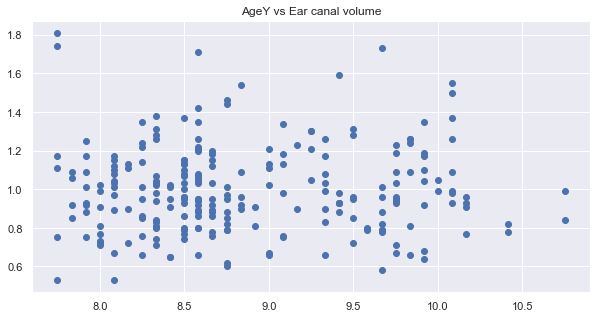

In [68]:
#Scatter plot on AgeY vs Ear Canal Volume
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(df_absrb.AgeY,df_absrb.ECV)
plt.title( "AgeY vs Ear canal volume" )



In the plot we can see that the Ear Canal Volume is dispersed among the age group

In [69]:
#Box Plot of Absorbance frequencies

plt.rcParams["figure.figsize"] = (20,10)
bxplt=df_absrb.iloc[:,39:].boxplot()
bxplt.tick_params(axis='x', labelrotation = 50)
plt.title( "Absorbance frequency boxplot" )


Text(0.5, 1.0, 'Absorbance frequency boxplot')

Here we can see the boxplots of the absorbance frequencies.We can see that the frequencies have alot of outliers.

In [70]:
# Boxplot of Otoacoustic emission

df_absrb.iloc[:,27:33].boxplot()


<AxesSubplot:>

[Text(0.5, 0, 'Otoacoustic emission'), Text(0, 0.5, 'Density')]

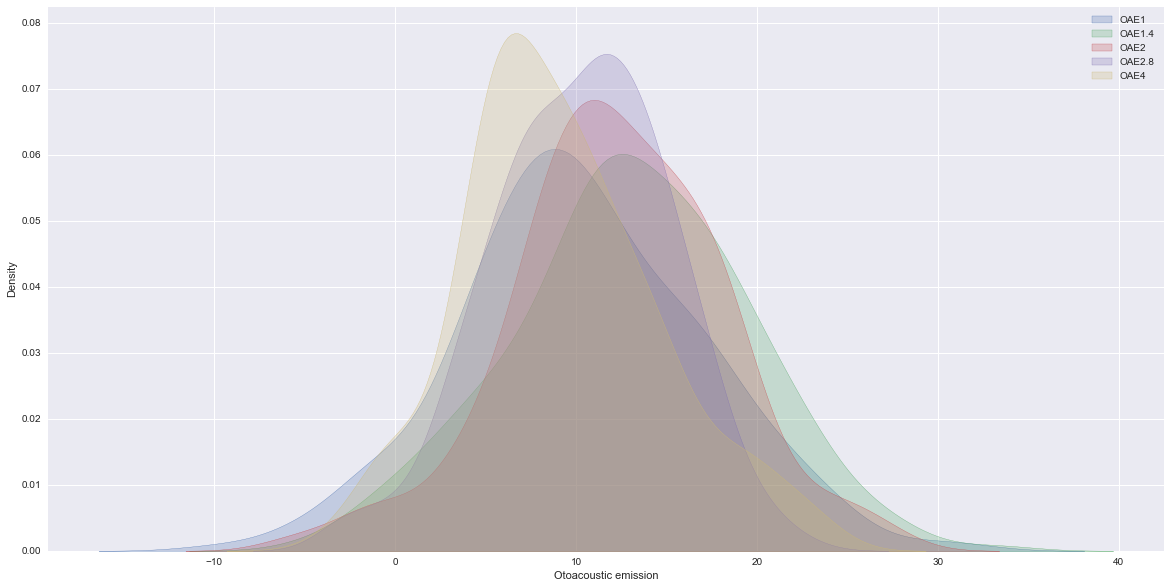

In [87]:
#Plot of different Otoacoustic emission imposed on each other

for col in list(df_absrb.iloc[:,27:32].columns):
                             ax=sns.kdeplot(df_absrb[col], shade=True)
plt.legend(df_absrb.iloc[:,27:32].columns)
ax.set(xlabel='Otoacoustic emission', ylabel='Density')



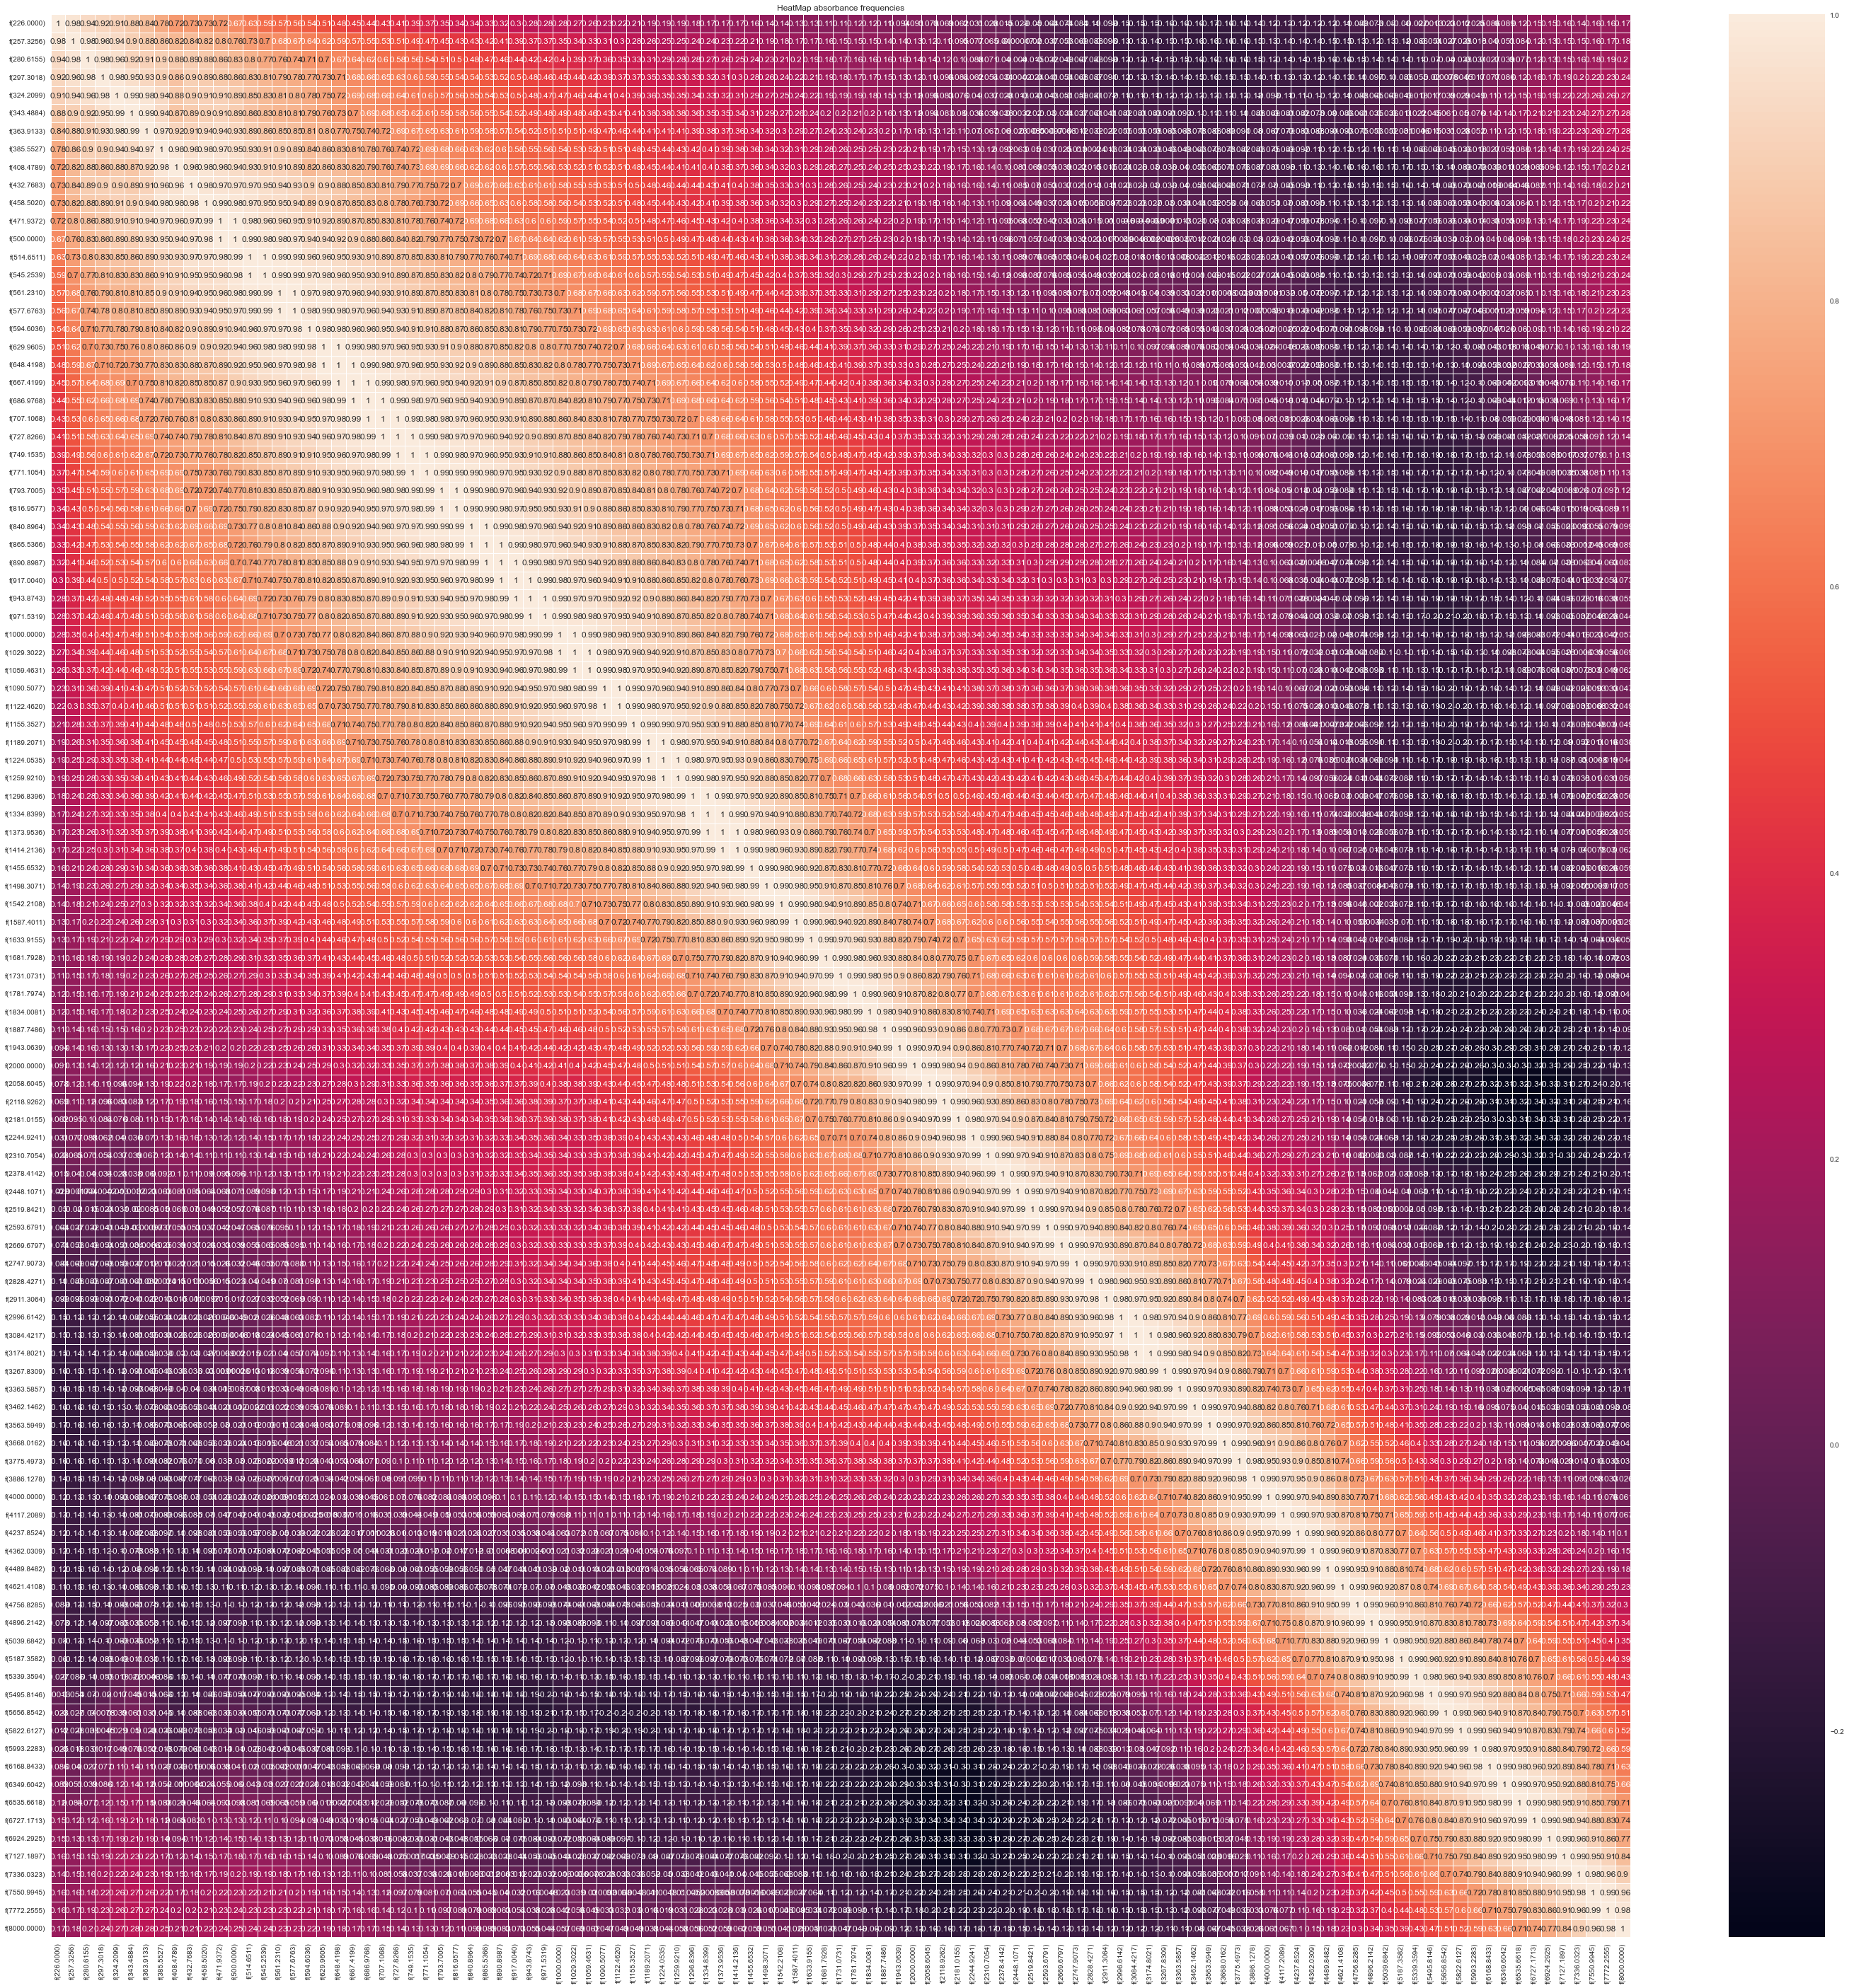

In [72]:
#Here we can see the correlation heatmap of the different frequencies

plt.style.use("seaborn")

#Plot the heatmap
plt.figure(figsize=(50,50))
heat_map = sns.heatmap( df_absrb.iloc[:,39:].corr(), linewidth = 1 , annot = True)
plt.title( "HeatMap absorbance frequencies" )
plt.show()

It is obvious from the heatmap we can say that the frequencies are highly correlated to each other. It should be one of the problems to be tackled in further progress of the project

In [73]:
df= df_absrb[["Subject","AgeY","OverallPoF","Gender"]]
df=df.join(df_absrb.iloc[:,39:])


In [74]:
#Plotting of all the frequencies.

df_freq=df_absrb.iloc[:,39:].melt()

In [75]:
plt.rcParams["figure.figsize"] = (20,10)

lnplot=sns.lineplot(x="variable", y="value", data=df_freq)
lnplot.tick_params(axis='x', labelrotation = 70)

Here we can see that the frequencies follow the ideal flow the wide band absorbance frequencies

In [76]:
df_pf = df_absrb[['OverallPoF'] +list(df_absrb.iloc[:,39:].columns)]
df_pf=df_pf.groupby("OverallPoF").mean()
df_pf=df_pf.melt( ignore_index = False)
df_pf=df_pf.reset_index()
df_pf=df_pf.replace(to_replace=[0, 1], value=["Pass", "Fail"])

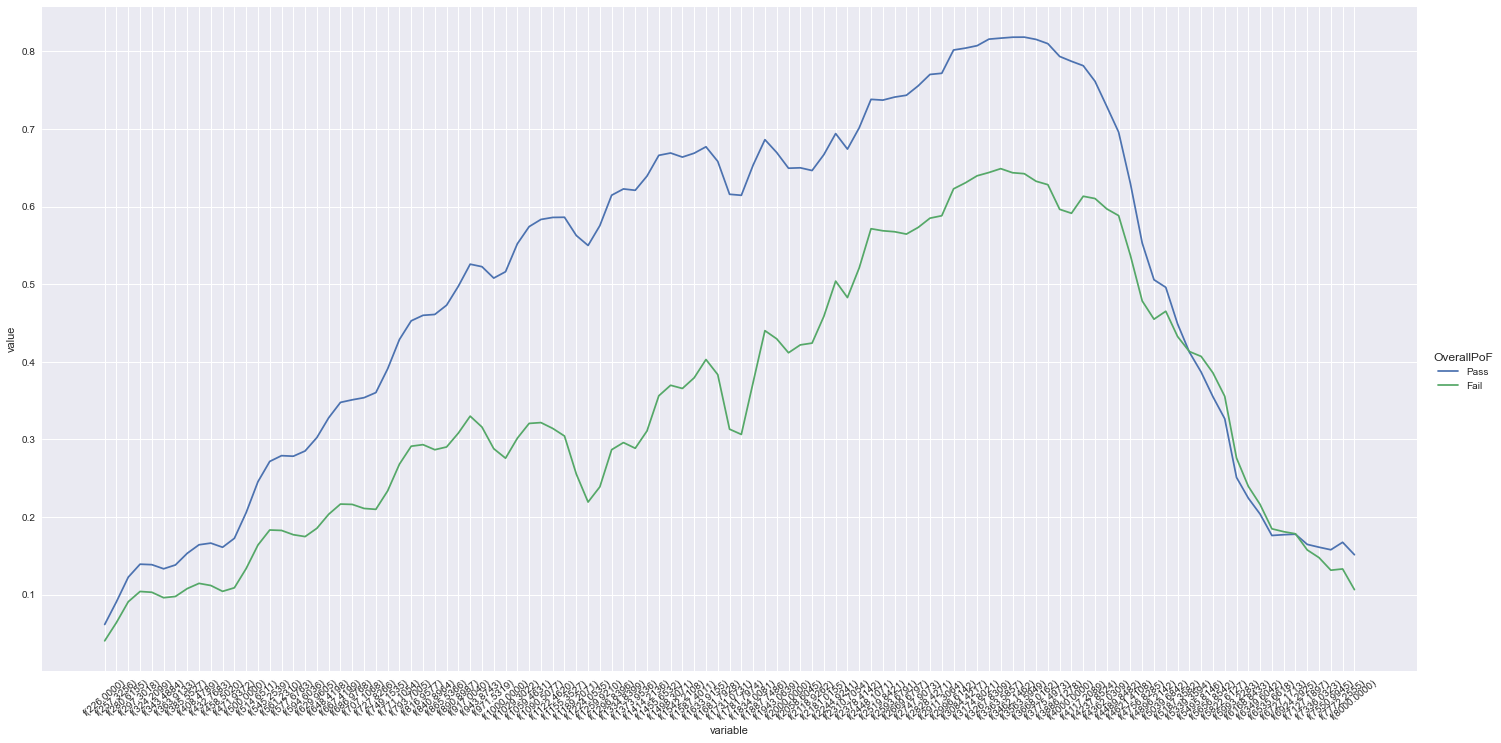

In [77]:
#Plot of frequencies divided into pass and fail

fg = sns.relplot(data=df_pf, x = "variable", y = "value", kind = "line", hue = "OverallPoF", height=10, aspect=20/10)
fg.set_xticklabels(rotation=40)

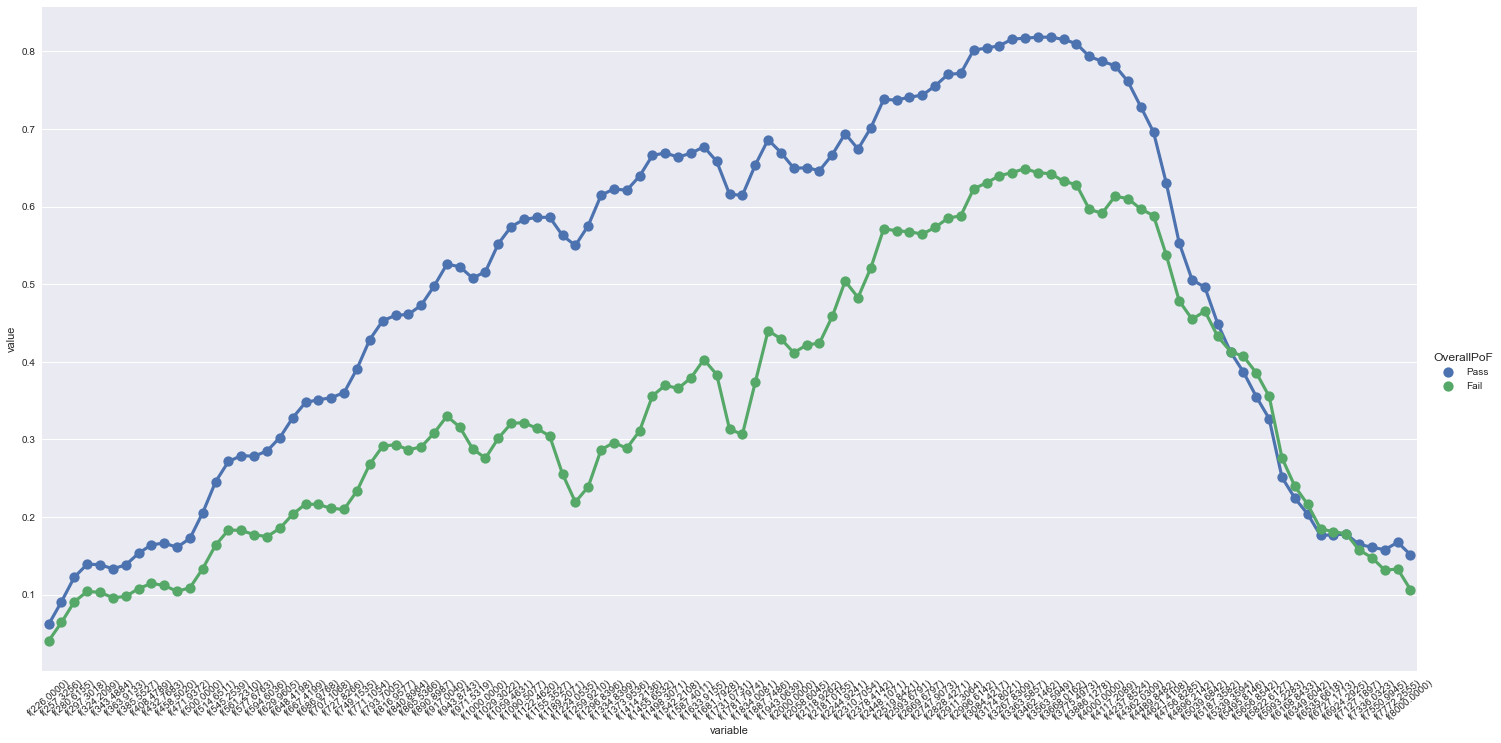

In [78]:
#Line plot with each points of the frequency marked divided into pass and fail

g = sns.catplot(x="variable", y="value", hue='OverallPoF', data=df_pf, kind='point',height=10, aspect=20/10)
g.set_xticklabels(rotation=40)

In the plot generally we can see that the line plot for fail is comparatively lesser than line plot for pass

In [79]:
#Plot with each points of frequencies  divided into left and right

df_ear = df_absrb[['EarSide'] +list(df_absrb.iloc[:,39:].columns)]
df_ear=df_ear.groupby("EarSide").mean()
df_ear=df_ear.melt( ignore_index = False)
df_ear=df_ear.reset_index()


In [81]:

fg = sns.relplot(data=df_ear, x = "variable", y = "value", kind = "line", hue = "EarSide", height=10, aspect=20/10)
fg.set_xticklabels(rotation=40)


In [82]:
#Plot with each points of frequencies marked divided into left and right

g = sns.catplot(x="variable", y="value", hue='EarSide', data=df_ear, kind='point',height=10, aspect=20/10)
g.set_xticklabels(rotation=40)


In [4]:
#Plot with each points of frequencies marked divided into male and female
df_gender = df_absrb[['Gender'] +list(df_absrb.iloc[:,39:].columns)]
df_gender['Gender'].replace(0, 'Male',inplace=True)
df_gender['Gender'].replace(1, 'Female',inplace=True)
df_gender=df_gender.groupby("Gender").mean()
df_gender=df_gender.melt( ignore_index = False)
df_gender=df_gender.reset_index()

/Users/govind/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [5]:
fg = sns.relplot(data=df_gender, x = "variable", y = "value", kind = "line", hue = "Gender", height=10, aspect=20/10)
fg.set_xticklabels(rotation=40)

The  plots of frequencies with earside and gender doesnot show a significant difference between themselves.In Plot where frequency is divided by gender  we can see that even though males have higher frequency absorbance towards the begining we can see  when the absorbance peaks females tend to have more absorbance.